In [1]:
cd "C:\Users\Hp\Desktop\College\Semester VI\Data Mining and Machine Learning\Assignments\Assignment 3"

C:\Users\Hp\Desktop\College\Semester VI\Data Mining and Machine Learning\Assignments\Assignment 3


#### Importing packages

In [2]:
# Common imports

import numpy as np
import pandas as pd
import matplotlib as mpl




# To make the notebook's output stable across runs

np.random.seed(42)



# Plotting figures

%matplotlib inline
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# Ignore useless warnings

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
# Importing Logistic Regression model

from sklearn.linear_model import LogisticRegression

#### Loading the datasets

In [4]:
classes = pd.read_csv("C:/Users\Hp\Desktop\College\Semester VI\Data Mining and Machine Learning\Assignments\Assignment 3\overhead\classes.csv")
labels = pd.read_csv("C:/Users\Hp\Desktop\College\Semester VI\Data Mining and Machine Learning\Assignments\Assignment 3\overhead\labels.csv")
test = pd.read_csv("C:/Users/Hp\Desktop\College\Semester VI\Data Mining and Machine Learning\Assignments\Assignment 3\overhead/test.csv")
train = pd.read_csv("C:/Users\Hp\Desktop\College\Semester VI\Data Mining and Machine Learning\Assignments\Assignment 3\overhead/train.csv")

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,86,91,98,97,96,89,76,84,87,...,76,81,80,72,77,83,71,44,53,33
1,3,128,133,129,119,114,128,141,131,133,...,137,129,139,161,128,137,131,125,127,135
2,0,138,117,84,52,38,62,86,75,101,...,63,99,109,83,61,54,75,98,107,108
3,6,105,108,108,109,111,112,107,104,106,...,120,115,105,89,87,98,92,95,89,84
4,5,176,143,109,155,151,149,145,152,156,...,92,85,82,91,80,80,79,79,82,85


In [6]:
train.shape

(8519, 785)

In [7]:
test.shape

(1065, 785)

In [8]:
X_train_1 = train.iloc[:, 1:]
y_train_1 = train.iloc[:, 0]

X_test_1 = test.iloc[:, 1:]
y_test_1 = test.iloc[:, 0]

Checking for unknown inputs in training and testing datasets

In [9]:
c = 'False'
for i in range(0, 785):
    if train.iloc[:, i].isnull().values.any() == True:
        c = True
        break
print("Is any value in training data unknown =", c)

c = 'False'
for i in range(0, 785):
    if test.iloc[:, i].isnull().values.any() == True:
        c = True
        break
print("Is any value in testing data unknown =", c)


Is any value in training data unknown = False
Is any value in testing data unknown = False


There is no unknown value in our datasets. So we can move to further preprocessing.

#### Normalizing the datasets

In [10]:
X_train_1 = X_train_1/255
X_test_1 = X_test_1/255

Splitting the training data further into training and validation set.

The splitting is done so that we work with only the given training data beforehand and prevent optimizing our model with respect to the given testing data. This prevents overfitting of model with respect to the testing data.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.30, random_state=42)

#### Logistic Regression on training dataset

In [12]:
from sklearn.linear_model import LogisticRegression

clf_reg_1 = LogisticRegression(random_state=42, max_iter = 1000)
clf_reg_1.fit(X_train, y_train)
clf_reg_1.score(X_test, y_test)

0.46205007824726135

In [13]:
print('Number of iterations for regression model to converge =', clf_reg_1.n_iter_[0])

Number of iterations for regression model to converge = 908


The Logistic Regression converges within 1000 iterations to give an accuracy of 46.20% on test data.

### Clustering

In [14]:
# Number of clusters = k

k = 450

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
kmeans.fit(X_train)
X_digits_dist = kmeans.transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train.iloc[representative_digit_idx, :]

In [17]:
print('Inertia =', kmeans.inertia_)
print('Number of iterations =', kmeans.n_iter_)

Inertia = 129886.03188657087
Number of iterations = 24


In [18]:
# Converting pandas.DataFrame to numpy.array

X_representative_digits_np = np.array(X_representative_digits)

In [19]:
# This is the step where manual labelling on representative elements occurs.
# The amount of data to be manually labelled is the number of clusters used for clustering.
# Since we already had all elements labelled, we are directly using the labels for these representative elements from the dataset.

y_representative_digits = np.array(y_train.iloc[representative_digit_idx])

In [20]:
clf_reg_2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=300, random_state=42)
clf_reg_2.fit(X_representative_digits, y_representative_digits)
clf_reg_2.score(X_test, y_test)

0.39397496087636935

Propagating the labells to entire dataset

In [21]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [22]:
clf_reg_3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=1000, random_state=1)
clf_reg_3.fit(X_train, y_train_propagated)
clf_reg_3.score(X_test, y_test)

0.32198748043818465

In [23]:
print('Number of iterations for regression model to converge =', clf_reg_3.n_iter_[0])

Number of iterations for regression model to converge = 222


Propagating the labells to closest 1% of each cluster from their respective centroids.

In [24]:
percentile_closest = 1

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

This number below tells the fraction of labelles propagated that have the correct label.

In [25]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9466950959488273

In [26]:
clf_reg_4 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
clf_reg_4.fit(X_train_partially_propagated, y_train_partially_propagated)
clf_reg_4.score(X_test, y_test)

0.3955399061032864

To prevent writing the same program for different number of clusters, we define a function (k_cluster) below that takes in the number of clusters (k) and percentage of propagation (p) and gives all the above outputs.

In [27]:
def k_cluster_1(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train)
    X_digits_dist = kmeans.transform(X_train)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train.iloc[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = np.array(y_train.iloc[representative_digit_idx])
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', log_reg.score(X_test, y_test))
    
    y_train_propagated = np.empty(len(X_train), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=1)
    log_reg.fit(X_train, y_train_propagated)
    print('Accuracy with labells propagated =', log_reg.score(X_test, y_test))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    print('Accuracy of percentage labels with actual labels =', np.mean(y_train_partially_propagated == y_train[partially_propagated]))
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', log_reg.score(X_test, y_test))

In [28]:
k_cluster_1(450, 20)

Accuracy with 450 clusters = 0.39397496087636935
Accuracy with labells propagated = 0.32198748043818465
Accuracy of percentage labels with actual labels = 0.6338609772883689
Accuracy with labells propagated to nearest 20% elements = 0.35093896713615025


This reduces the effort of changing the number of clusters each time. But still, this method does not gives us the optimal number of clusters to use in building our semi-supervised learning model. Also, we don't know any optimal method to declare what number of clusters should be considered 'ideal'.

The problem is as follows:$\\$


If we take very few clusters, we will be having very less information (labelled data) and a large amount of unknown (unlabelled data). Thus if we train our model using clustering on these labels, we would get relatively very less accuracy as we were getting from using the entire training dataset.$\\$
On the other hand, if we take very large number of clusters (relative to number of elements in training data), then surely our accuracy after clustering should be good (very close to the one on entire training dataset). But then as number of clusters have increased, the number of labelled data have increased. Thus the cost of making this model increases, since then we have to make sure we have a large amount of manually labelled data.

So we have to take the number of clusters neither too small nor too large, but someway in between, providing the lowest payoff between accuracy and cost of making the model.$\\$
This looks a hard work to do and we don't know where to even start.

In such a case, plotting seems to be a promosing approach, since we just have to purturb the number of clusters and find the accuracy on the representative elements. We can plot an 'Accuracy Vs Number_of_clusters' graph from this. This should give us some hint on how to find a suitable number of clusters.

In [29]:
scores = []

In [30]:
def f(x, y, n):
    for k in range(x, y+1, n):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
        kmeans.fit(X_train)
        X_digits_dist = kmeans.transform(X_train)
        representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
        X_representative_digits = X_train.iloc[representative_digit_idx, :]
        X_representative_digits_np = np.array(X_representative_digits)
        
        y_representative_digits = np.array(y_train.iloc[representative_digit_idx])
        
        log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
        log_reg.fit(X_representative_digits, y_representative_digits)
        scores.append(log_reg.score(X_test, y_test))

In [31]:
# Finding the accuracy for each cluster between 50 to 1000, with consecutive difference of 50 clusters.
# This will take some time to run. But once compiled, we can use this data immediately to plot our graph.

f(50, 1000, 50)

In [32]:
for i in range(len(scores)):
    print((i+1)*50 , "->", scores[i])

50 -> 0.23748043818466355
100 -> 0.2750391236306729
150 -> 0.32003129890453835
200 -> 0.3673708920187793
250 -> 0.3767605633802817
300 -> 0.37871674491392804
350 -> 0.39123630672926446
400 -> 0.39710485133020346
450 -> 0.39397496087636935
500 -> 0.3951486697965571
550 -> 0.3986697965571205
600 -> 0.4029733959311424
650 -> 0.4064945226917058
700 -> 0.4064945226917058
750 -> 0.41744913928012517
800 -> 0.41744913928012517
850 -> 0.4154929577464789
900 -> 0.424491392801252
950 -> 0.42214397496087636
1000 -> 0.42527386541471046


In [33]:
# Arranging the number of clusters in decreasing order of their accuracy.

50 + (np.argsort(scores)[::-1])*50

array([1000,  900,  950,  800,  750,  850,  700,  650,  600,  550,  400,
        500,  450,  350,  300,  250,  200,  150,  100,   50], dtype=int64)

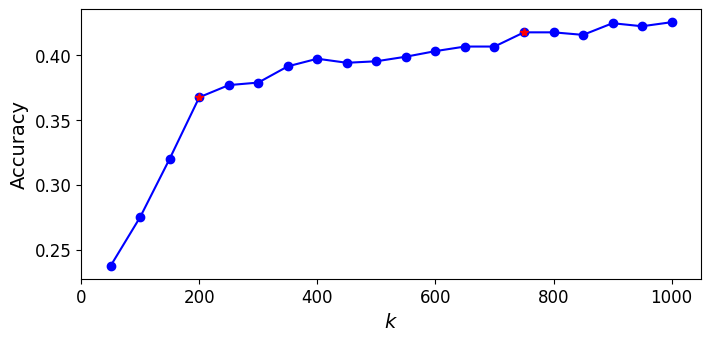

In [34]:
# Now time to plot our graph.

plt.figure(figsize=(8, 3.5))
plt.plot([n for n in range(50, 1001, 50)], scores, 'bo-')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.axis([0, 1050, np.min(scores) - 0.01, np.max(scores) + 0.01])
plt.plot(200, scores[3], 'r*')
plt.plot(750, scores[14], 'r*')

plt.show()

From the above graph, it is not exactly clear which value of k to choose. We can choose k = 200 and justify that since after 200 clusters, the accuracy is not increasing very much, so increasing number of clusters beyond 200 will not be very feasible.$\\$
One could also use k = 750 with the same reasoning. In this case, the initial increase in accuracy with respect to number of cluster is increasing, although with a lower rate, but not at a rate which can be neglected (not an infeasible rate).

# Applying PCA before clustering

Now before clustering, we apply a step of dimensionality reduction, called the Principal Component Analysis, or PCA. This will reduce the number of dimensions of our dataset to a smaller dimension. Our dataset have $28 \times 28 = 784$ dimension. We reduce it to, say 25. Let's then apply two different models on this reduced dataset. One will be our earlier Logistic Regression and other will be Support Vector Machine, or SVM.

In [35]:
t = 25

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=t, random_state=42)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Logistic Regression

#### Logistic Regression on Entire training dataset

In [37]:
from sklearn.linear_model import LogisticRegression

clf_reg_5 = LogisticRegression(random_state=42, max_iter = 500)
clf_reg_5.fit(X_train_pca, y_train)
clf_reg_5.score(X_test_pca, y_test)

0.46517996870109546

In [38]:
print('Number of iterations for regression model to converge =', clf_reg_5.n_iter_[0])

Number of iterations for regression model to converge = 85


The Logistic Regression converges within 200 iterations to give an accuracy of 47.18% on test data.

Note that the model takes relatively very less time to fit than earlier. This is because the number of attributes is now very few. Earlier there were 784 attributes, now there are just 25.

### Clustering

In [39]:
k = 450

In [40]:
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=100, random_state=42, )
kmeans.fit(X_train_pca)
X_digits_dist = kmeans.transform(X_train_pca)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train_pca[representative_digit_idx, :]

In [41]:
print('Inertia =', kmeans.inertia_)
print('Number of iterations =', kmeans.n_iter_)

Inertia = 41947.94629306982
Number of iterations = 29


In [42]:
X_representative_digits_np = np.array(X_representative_digits)

In [43]:
y_representative_digits = np.array(y_train.iloc[representative_digit_idx])

Accuracy on representative elements

In [44]:
clf_reg_6= LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=300, random_state=42)
clf_reg_6.fit(X_representative_digits, y_representative_digits)
clf_reg_6.score(X_test_pca, y_test)

0.4182316118935837

Accuracy for labells propagated to entire dataset

In [45]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [46]:
clf_reg_7= LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=200, random_state=1)
clf_reg_7.fit(X_train_pca, y_train_propagated)
clf_reg_7.score(X_test_pca, y_test)

0.40923317683881066

In [47]:
print('Number of iterations for regression model to converge =', clf_reg_7.n_iter_[0])

Number of iterations for regression model to converge = 32


Accuracy on labells propagated to 1% of elements closest to each cluster.

In [48]:
percentile_closest = 1

X_cluster_dist = X_digits_dist[np.arange(len(X_train_pca)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train_pca[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

The number below gives the fraction of propagated data points that have the correct labels

In [49]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9913793103448276

In [50]:
clf_reg_8 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
clf_reg_8.fit(X_train_partially_propagated, y_train_partially_propagated)
clf_reg_8.score(X_test_pca, y_test)

0.4182316118935837

Once again we define a function (k_cluster) to find the accuracy on a given number of clusters and percentage of propagation

In [51]:
def k_cluster_2(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train_pca)
    X_digits_dist = kmeans.transform(X_train_pca)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train_pca[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = np.array(y_train.iloc[representative_digit_idx])
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', log_reg.score(X_test_pca, y_test))
    
    y_train_propagated = np.empty(len(X_train_pca), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=1)
    log_reg.fit(X_train_pca, y_train_propagated)
    print('Accuracy with labells propagated =', log_reg.score(X_test_pca, y_test))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train_pca)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train_pca[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    print('Accuracy of percentage labels with actual labels =', np.mean(y_train_partially_propagated == y_train[partially_propagated]))
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', log_reg.score(X_test_pca, y_test))

In [52]:
k_cluster_2(500, 20)

Accuracy with 500 clusters = 0.40805946791862285
Accuracy with labells propagated = 0.3810641627543036
Accuracy of percentage labels with actual labels = 0.7088967971530249
Accuracy with labells propagated to nearest 20% elements = 0.40023474178403756


We again make a plot of accuracy Vs number of clusters with respect to this model

In [53]:
scores = []

In [54]:
def f(x, y, n):
    for k in range(x, y+1, n):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
        kmeans.fit(X_train_pca)
        X_digits_dist = kmeans.transform(X_train_pca)
        representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
        X_representative_digits = X_train_pca[representative_digit_idx, :]
        X_representative_digits_np = np.array(X_representative_digits)
        
        y_representative_digits = np.array(y_train.iloc[representative_digit_idx])
        
        log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
        log_reg.fit(X_representative_digits, y_representative_digits)
        scores.append(log_reg.score(X_test_pca, y_test))

In [55]:
f(50, 1000, 50)

In [56]:
for i in range(len(scores)):
    print((i+1)*50 , "->", scores[i])

50 -> 0.30633802816901406
100 -> 0.365414710485133
150 -> 0.4061032863849765
200 -> 0.3931924882629108
250 -> 0.4072769953051643
300 -> 0.3955399061032864
350 -> 0.3884976525821596
400 -> 0.3967136150234742
450 -> 0.4182316118935837
500 -> 0.40805946791862285
550 -> 0.4104068857589984
600 -> 0.40179968701095464
650 -> 0.3857589984350548
700 -> 0.38497652582159625
750 -> 0.3830203442879499
800 -> 0.38380281690140844
850 -> 0.3857589984350548
900 -> 0.38497652582159625
950 -> 0.3767605633802817
1000 -> 0.37715179968701096


In [57]:
# To give a list to number of clusters sorted in descending order of accuracy

50 + (np.argsort(scores)[::-1])*50

array([ 450,  550,  500,  250,  150,  600,  400,  300,  200,  350,  850,
        650,  900,  700,  800,  750, 1000,  950,  100,   50], dtype=int64)

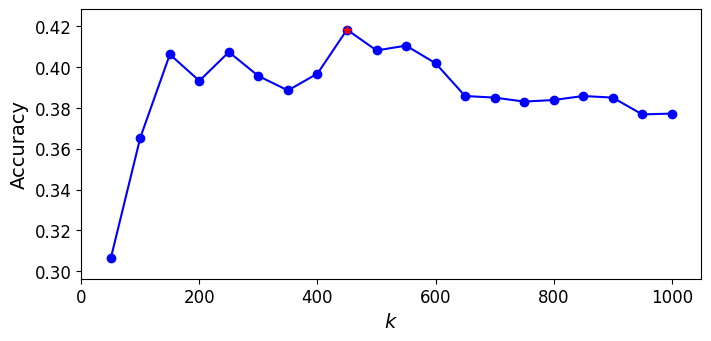

In [58]:
# The plot

plt.figure(figsize=(8, 3.5))
plt.plot([n for n in range(50, 1001, 50)], scores, 'bo-')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.axis([0, 1050, np.min(scores) - 0.01, np.max(scores) + 0.01])
plt.plot(450, scores[8], 'r*')

plt.show()

This graph looks more promising, since we can set k = 450 and say that within 1000 clusters, we will get a good accuracy for 450 clusters, which on our split testing data is around 41.82%.

## SVM

We now do everything exactly as above, just with a Support Vector Classifier instead of a Logistic Regressor

In [59]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train_pca, y_train)
svc.score(X_test_pca, y_test)

0.6494522691705791

SVM after Clustering

In [60]:
svc = SVC(random_state=42)
svc.fit(X_representative_digits, y_representative_digits)
svc.score(X_test_pca, y_test)

0.5254303599374022

SVM after propagation

In [61]:
svc = SVC(random_state=42)
svc.fit(X_train_pca, y_train_propagated)
svc.score(X_test_pca, y_test)

0.5

SVM after 1% propagation

In [62]:
svc = SVC(random_state=42)
svc.fit(X_train_partially_propagated, y_train_partially_propagated)
svc.score(X_test_pca, y_test)

0.5242566510172144

In [63]:
def k_cluster_3(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train_pca)
    X_digits_dist = kmeans.transform(X_train_pca)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train_pca[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = np.array(y_train.iloc[representative_digit_idx])
    
    svc = SVC(random_state=42)
    svc.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', svc.score(X_test_pca, y_test))
    
    y_train_propagated = np.empty(len(X_train_pca), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    svc = SVC(random_state=1)
    svc.fit(X_train_pca, y_train_propagated)
    print('Accuracy with labells propagated =', svc.score(X_test_pca, y_test))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train_pca)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train_pca[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    print('Accuracy of percentage labels with actual labels =', np.mean(y_train_partially_propagated == y_train[partially_propagated]))
    
    svc = SVC(random_state=42)
    svc.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', svc.score(X_test_pca, y_test))

In [64]:
k_cluster_3(500, 1)

Accuracy with 500 clusters = 0.5348200312989045
Accuracy with labells propagated = 0.49921752738654146
Accuracy of percentage labels with actual labels = 0.9863813229571985
Accuracy with labells propagated to nearest 1% elements = 0.5410798122065728


In [65]:
def f(x, y, n):
    for k in range(x, y+1, n):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
        kmeans.fit(X_train_pca)
        X_digits_dist = kmeans.transform(X_train_pca)
        representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
        X_representative_digits = X_train_pca[representative_digit_idx, :]
        X_representative_digits_np = np.array(X_representative_digits)
        
        y_representative_digits = np.array(y_train.iloc[representative_digit_idx])
        
        svc = SVC(random_state=42)
        svc.fit(X_representative_digits, y_representative_digits)
        scores.append(svc.score(X_test_pca, y_test))

In [66]:
scores = []

In [67]:
f(50, 1000, 50)

In [68]:
for i in range(len(scores)):
    print((i+1)*50 , "->", scores[i])

50 -> 0.31690140845070425
100 -> 0.392018779342723
150 -> 0.431924882629108
200 -> 0.46635367762128327
250 -> 0.458528951486698
300 -> 0.46557120500782473
350 -> 0.48865414710485133
400 -> 0.49608763693270735
450 -> 0.5254303599374022
500 -> 0.5348200312989045
550 -> 0.4910015649452269
600 -> 0.5050860719874805
650 -> 0.4980438184663537
700 -> 0.52660406885759
750 -> 0.4968701095461659
800 -> 0.49608763693270735
850 -> 0.5043035993740219
900 -> 0.5129107981220657
950 -> 0.5152582159624414
1000 -> 0.505868544600939


In [69]:
50 + (np.argsort(scores)[::-1])*50

array([ 500,  700,  450,  950,  900, 1000,  600,  850,  650,  750,  800,
        400,  550,  350,  200,  300,  250,  150,  100,   50], dtype=int64)

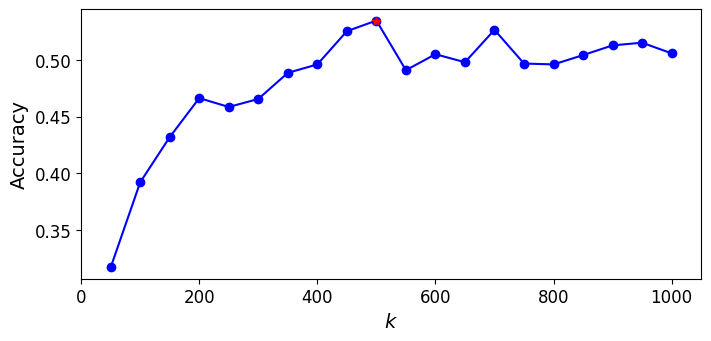

In [70]:
plt.figure(figsize=(8, 3.5))
plt.plot([n for n in range(50, 1001, 50)], scores, 'bo-')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.axis([0, 1050, np.min(scores) - 0.01, np.max(scores) + 0.01])
plt.plot(500, scores[9], 'r*')

plt.show()

This graph also looks very promising, since we can set k = 500 and say that here we get the maxixum accuracy within 1000 clusters, of around 53.48%.

### Now, using this model on our original testing dataset

Clustering and Logistic Regression:

In [71]:
def k_cluster_1(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train_1)
    X_digits_dist = kmeans.transform(X_train_1)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train_1.iloc[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = np.array(y_train_1.iloc[representative_digit_idx])
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', log_reg.score(X_test_1, y_test_1))
    
    y_train_propagated = np.empty(len(X_train_1), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=1)
    log_reg.fit(X_train_1, y_train_propagated)
    print('Accuracy with labells propagated =', log_reg.score(X_test_1, y_test_1))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train_1)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train_1[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', log_reg.score(X_test_1, y_test_1))

In [72]:
k_cluster_1(200, 10)

Accuracy with 200 clusters = 0.3455399061032864
Accuracy with labells propagated = 0.28732394366197184
Accuracy with labells propagated to nearest 10% elements = 0.292018779342723


PCA, Clustering then Logistic Regression:

In [73]:
pca = PCA(n_components=t, random_state=42)
pca.fit(X_train_1)
X_train_1_pca = pca.transform(X_train_1)
X_test_1_pca = pca.transform(X_test_1)

In [74]:
def k_cluster_2(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train_1_pca)
    X_digits_dist = kmeans.transform(X_train_1_pca)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train_1_pca[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = np.array(y_train_1.iloc[representative_digit_idx])
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', log_reg.score(X_test_1_pca, y_test_1))
    
    y_train_propagated = np.empty(len(X_train_1_pca), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=1)
    log_reg.fit(X_train_1_pca, y_train_propagated)
    print('Accuracy with labells propagated =', log_reg.score(X_test_1_pca, y_test_1))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train_1_pca)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train_1_pca[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', log_reg.score(X_test_1_pca, y_test_1))

In [75]:
k_cluster_2(450, 10)

Accuracy with 450 clusters = 0.4084507042253521
Accuracy with labells propagated = 0.4056338028169014
Accuracy with labells propagated to nearest 10% elements = 0.41502347417840374


PCA, Clustering then SVM:

In [76]:
def k_cluster_3(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train_1_pca)
    X_digits_dist = kmeans.transform(X_train_1_pca)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train_1_pca[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = np.array(y_train_1.iloc[representative_digit_idx])
    
    svc = SVC(random_state=42)
    svc.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', svc.score(X_test_1_pca, y_test_1))
    
    y_train_propagated = np.empty(len(X_train_1_pca), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    svc = SVC(random_state=1)
    svc.fit(X_train_1_pca, y_train_propagated)
    print('Accuracy with labells propagated =', svc.score(X_test_1_pca, y_test_1))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train_1_pca)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train_1_pca[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    svc = SVC(random_state=42)
    svc.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', svc.score(X_test_1_pca, y_test_1))

In [77]:
k_cluster_3(500, 10)

Accuracy with 500 clusters = 0.539906103286385
Accuracy with labells propagated = 0.5117370892018779
Accuracy with labells propagated to nearest 10% elements = 0.5267605633802817


In summary, we are getting a maximum accuracy by Dimensionality Reduction into 25 attributes using PCA, then clustering into 500 clusters, and the manually labelling the elements nearest to centroids of each cluster and training an SVM model using them.$\\$
On the given training and testing sample, we are getting an accuracy of around 54%.